In [25]:
import json
import pandas as pd
import numpy as np
from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import os
import copy

In [56]:
data_path = "data_json/"
with open(data_path + "twitter_time_series_to_2_14.json") as f:
    twitter_file = json.loads(f.read())
    twitter = {k: pd.read_json(v, orient='columns') for k, v in twitter_file.items()}
with open(data_path + "youtube_time_series_to_2_14.json") as f:
    youtube_file = json.loads(f.read())
    youtube = {k: pd.read_json(v, orient='columns') for k, v in youtube_file.items()}
corrTwitter = pd.read_csv('./data_csv/corr_131_twitter.csv', header=0,index_col=0)
corrYoutube = pd.read_csv('./data_csv/corr_131_youtube.csv', header=0,index_col=0)

In [88]:
def corr_to_csv():
	# correlation between infoID (narrative) and eventID (GDELT event)
	# Output csv file format:
	#          eventID1, eventID2, ...
	# infoID1,    c11  ,    c12  , ...
	# infoID2,    c21  ,    c22  , ...

	with open('./data_json/corrmat_to_2_14.json', 'r') as f:
		d = json.loads(f.read())

	corr_twitter = np.array(d['twitterGdeltMat'])
	corr_youtube = np.array(d['youtubeGdeltMat'])

	x = d['eventCodeMap'].items()
	x = sorted(x, key=lambda a:a[1])
	eventID = [key for key,ind in x]
	x = d['narrativeMap'].items()
	x = sorted(x, key=lambda a:a[1])
	infoID = [key for key,ind in x]

	df_twitter = pd.DataFrame(corr_twitter.T, index=infoID, columns=eventID)
	df_youtube = pd.DataFrame(corr_youtube.T, index=infoID, columns=eventID)

	df_twitter.to_csv('./data_csv/corr_bert_214_twitter.csv')
	df_youtube.to_csv('./data_csv/corr_bert_214_youtube.csv')
corr_to_csv()
corrTwi214 =pd.read_csv('./data_csv/corr_bert_214_twitter.csv', header=0,index_col=0)
corrYou214 =pd.read_csv('./data_csv/corr_bert_214_youtube.csv', header=0,index_col=0)

In [33]:
with open('./data_json/gdelt_time_series.json', 'r') as f:
    d = json.loads(f.read())
gdelt = {k: pd.read_json(v, typ='series') for k, v in d.items()}

In [23]:
corrTwitter.max(axis=1)

arrests                              0.865989
arrests/opposition                   0.867213
guaido/legitimate                    0.829771
international/aid                    0.851955
international/aid_rejected           0.927185
international/respect_sovereignty    0.941865
maduro/cuba_support                  0.615512
maduro/dictator                      0.801222
maduro/legitimate                    0.938636
maduro/narco                         0.727506
military                             0.890609
military/desertions                  0.762396
other/anti_socialism                 0.903339
other/censorship_outage              0.868739
other/chavez                         0.788945
other/chavez/anti                    0.795743
protests                             0.804182
violence                             0.858834
dtype: float64

In [24]:
corrTwitter.idxmax(axis=1)

arrests                              0831
arrests/opposition                   0831
guaido/legitimate                     141
international/aid                     070
international/aid_rejected            141
international/respect_sovereignty     075
maduro/cuba_support                  1014
maduro/dictator                       141
maduro/legitimate                     141
maduro/narco                         1712
military                              180
military/desertions                   182
other/anti_socialism                  141
other/censorship_outage              1014
other/chavez                         1014
other/chavez/anti                    1014
protests                             1712
violence                              141
dtype: object

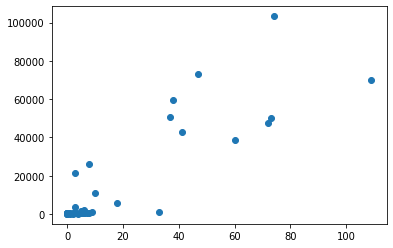

In [49]:
# arrests
plt.figure()
plt.plot(np.array(gdelt['0831'][:39]),twitter['arrests']['EventCount'][:39],'o')
plt.show()

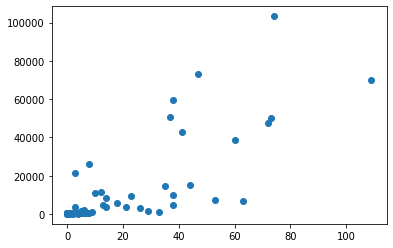

In [48]:
plt.figure()
plt.plot(np.array(gdelt['0831'][:53]),twitter['arrests']['EventCount'],'o')
plt.show()

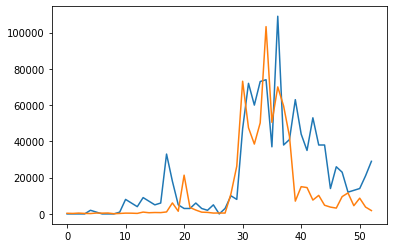

In [53]:
plt.figure()
d = np.array(gdelt['0831'][:53])*1000
plt.plot(d)
plt.plot(np.array(twitter['arrests']['EventCount']))
plt.show()

In [64]:
corrTwitter25 = corrTwitter.apply(pd.Series.nlargest, axis = 1, n = 25)

In [81]:
nodelist = ["arrests","arrests/opposition","guaido/legitimate","international/aid","international/aid_rejected",
            "international/respect_sovereignty","maduro/cuba_support","maduro/dictator","maduro/legitimate",
            "maduro/narco","military","military/desertions","other/anti_socialism","other/censorship_outage",
            "other/chavez","other/chavez/anti","protests","violence"]
for key in nodelist:
    print(key, sorted(corrTwitter.loc[key,:])[-2])

arrests 0.8637866912815553
arrests/opposition 0.8526193303660282
guaido/legitimate 0.8205378390668153
international/aid 0.849524671044434
international/aid_rejected 0.8527198983279215
international/respect_sovereignty 0.9183202754767708
maduro/cuba_support 0.596333010271295
maduro/dictator 0.795728742577703
maduro/legitimate 0.8506162292186545
maduro/narco 0.7036980827647332
military 0.8568684591354062
military/desertions 0.6647458145036488
other/anti_socialism 0.8651295363606705
other/censorship_outage 0.7648760662432399
other/chavez 0.755106827382164
other/chavez/anti 0.7648745150491296
protests 0.7782836466682594
violence 0.8277930885398557


### sorted(corrTwitter.loc['arrests',:])

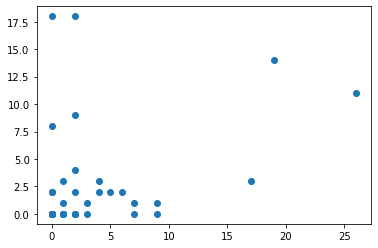

In [85]:
plt.figure()
plt.plot(np.array(gdelt['1014'][:39]),youtube['maduro/cuba_support']['EventCount'][:39],'o')
plt.show()

In [91]:
corrTwi214.idxmax(axis = 1)


arrests                                   1721
arrests/opposition                        1721
arrests/opposition/media                  1231
arrests/opposition/protesters              083
assembly/legitimate                        094
crisis                                    0233
crisis/lack_essentials                     073
crisis/looting                            0351
guaido/illegitimate                        126
guaido/legitimate                          141
guaido/legitimate/international           0333
guaido/us_support                         0333
international/aid                          073
international/aid_rejected                0233
international/break_us_relations           150
international/emigration                   094
international/military                     126
international/respect_sovereignty          075
international/us_sanctions                1231
maduro/cuba_support                        094
maduro/dictator                            141
maduro/events